# Import dataset

In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

#set folder path
folder = 'data'
#fd = folder + '/uncorrupted_signal_folder'
#fd_km = fd + '/Clusters4096'
fd = folder
fd_km = fd

In [2]:
data_train = pd.read_pickle(fd_km + '/data_train_v1').reset_index().iloc[:,1:] #full set
data_test = pd.read_pickle(fd_km + '/data_test_v1').reset_index().iloc[:,1:]  

In [3]:
data_train

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
...,...,...,...,...,...,...
1385078,10000,66500,0.000118,0.000253,0.000761,2393
1385079,10000,67000,0.000097,0.000186,0.000755,1893
1385080,10000,67500,0.000078,0.000113,0.000743,1393
1385081,10000,68000,0.000060,0.000037,0.000718,893


In [4]:
data_train[data_train.ID == 1]

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
...,...,...,...,...,...,...
132,1,66000,0.000095,0.000178,0.000754,2053
133,1,66500,0.000078,0.000112,0.000743,1553
134,1,67000,0.000062,0.000044,0.000721,1053
135,1,67500,0.000047,-0.000022,0.000684,553


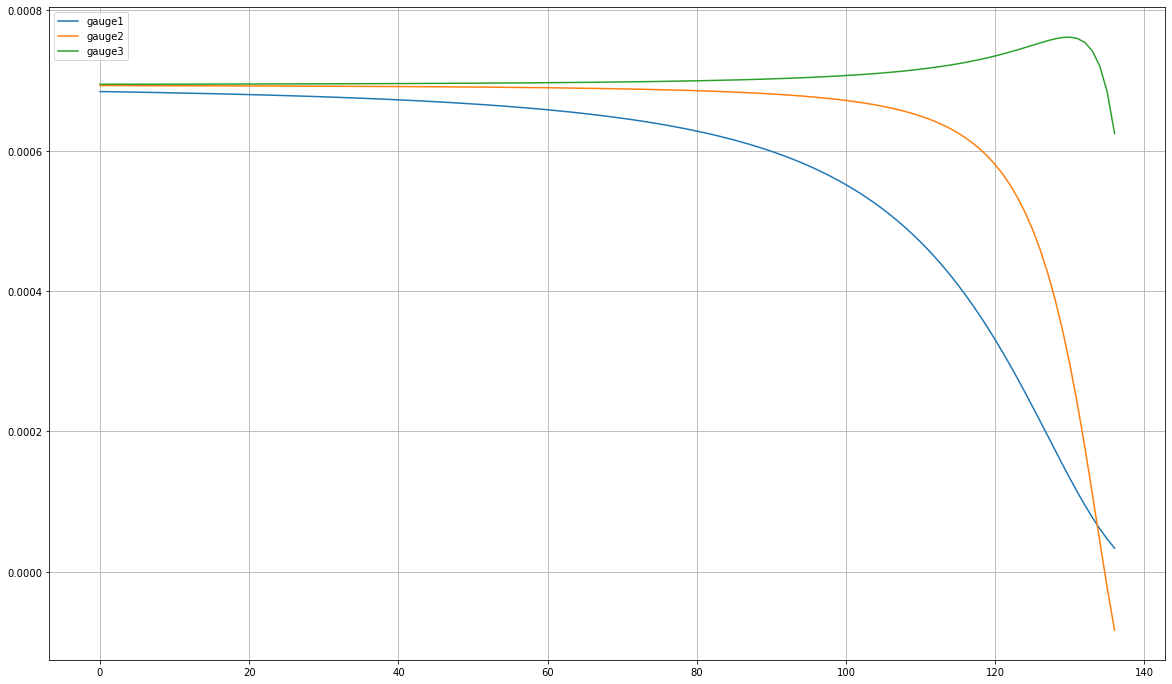

In [5]:
plt.figure(figsize=(20, 12))
plt.plot(data_train[data_train.ID == 1]['gauge1'],label= 'gauge1')
plt.plot(data_train[data_train.ID == 1][ 'gauge2'],label= 'gauge2')
plt.plot(data_train[data_train.ID == 1]['gauge3'], label= 'gauge3')
plt.grid()
plt.legend()
plt.show()

In [6]:
data_train.head(10)

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,68053
1,1,500,0.000684,0.000693,0.000695,67553
2,1,1000,0.000684,0.000693,0.000695,67053
3,1,1500,0.000684,0.000693,0.000695,66553
4,1,2000,0.000684,0.000693,0.000695,66053
5,1,2500,0.000683,0.000693,0.000695,65553
6,1,3000,0.000683,0.000693,0.000695,65053
7,1,3500,0.000683,0.000693,0.000695,64553
8,1,4000,0.000683,0.000693,0.000695,64053
9,1,4500,0.000683,0.000693,0.000695,63553


In [7]:
data_test[data_test.ID==1]

,ID,cycle,gauge1,gauge2,gauge3,RUL
0,1,0,0.000684,0.000693,0.000695,64540
1,1,500,0.000684,0.000693,0.000695,64040
2,1,1000,0.000684,0.000693,0.000695,63540
3,1,1500,0.000684,0.000693,0.000695,63040
4,1,2000,0.000684,0.000693,0.000695,62540
5,1,2500,0.000684,0.000693,0.000695,62040
6,1,3000,0.000683,0.000693,0.000695,61540
7,1,3500,0.000683,0.000693,0.000695,61040
8,1,4000,0.000683,0.000693,0.000695,60540
9,1,4500,0.000683,0.000693,0.000695,60040


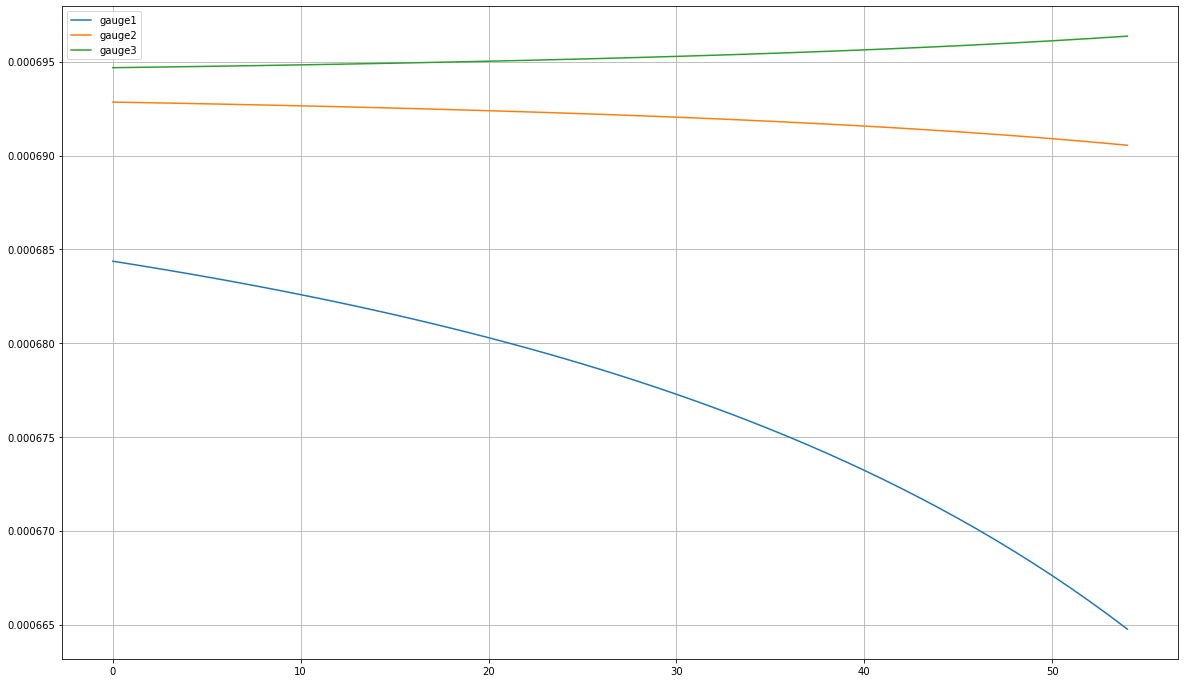

In [8]:
plt.figure(figsize=(20, 12))
plt.plot(data_test[data_test.ID == 1]['gauge1'],label= 'gauge1')
plt.plot(data_test[data_test.ID == 1][ 'gauge2'],label= 'gauge2')
plt.plot(data_test[data_test.ID == 1]['gauge3'], label= 'gauge3')
plt.grid()
plt.legend()
plt.show()

# Categorise RUL data

In [9]:
print(data_train.RUL.describe())
print(data_test.RUL.describe())

count    1.385083e+06
mean     3.477047e+04
std      2.023644e+04
min      0.000000e+00
25%      1.731200e+04
50%      3.462700e+04
75%      5.193900e+04
max      8.189600e+04
Name: RUL, dtype: float64
count     8782.000000
mean     45427.648144
std      15643.733322
min       3964.000000
25%      34177.000000
50%      46891.000000
75%      57867.500000
max      79327.000000
Name: RUL, dtype: float64


[    0.          4210.52631579  8421.05263158 12631.57894737
 16842.10526316 21052.63157895 25263.15789474 29473.68421053
 33684.21052632 37894.73684211 42105.26315789 46315.78947368
 50526.31578947 54736.84210526 58947.36842105 63157.89473684
 67368.42105263 71578.94736842 75789.47368421 80000.        ]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


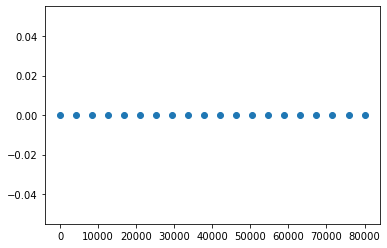

In [10]:
l=0.5
nb_bins = 20
lower_bin_bound = 0
upper_bin_bound = 80000

bins = np.linspace(lower_bin_bound, upper_bin_bound, nb_bins)
#bins = np.linspace(lower_bin_bound, upper_bin_bound**(1-l), nb_bins)**(1/l)
labels=[i for i in range(bins.shape[0]-1)]
plt.plot(bins,np.full(bins.shape[0],0),'o')
print(bins)
print(labels)

In [11]:
data_train['RUL_bins'] = pd.cut(data_train['RUL'], bins=bins, labels=labels)
data_test['RUL_bins'] = pd.cut(data_test['RUL'], bins=bins, labels=labels)

In [12]:
display(data_train)
display(data_test)

,ID,cycle,gauge1,gauge2,gauge3,RUL,RUL_bins
0,1,0,0.000684,0.000693,0.000695,68053,16
1,1,500,0.000684,0.000693,0.000695,67553,16
2,1,1000,0.000684,0.000693,0.000695,67053,15
3,1,1500,0.000684,0.000693,0.000695,66553,15
4,1,2000,0.000684,0.000693,0.000695,66053,15
...,...,...,...,...,...,...,...
1385078,10000,66500,0.000118,0.000253,0.000761,2393,0
1385079,10000,67000,0.000097,0.000186,0.000755,1893,0
1385080,10000,67500,0.000078,0.000113,0.000743,1393,0
1385081,10000,68000,0.000060,0.000037,0.000718,893,0


,ID,cycle,gauge1,gauge2,gauge3,RUL,RUL_bins
0,1,0,0.000684,0.000693,0.000695,64540,15
1,1,500,0.000684,0.000693,0.000695,64040,15
2,1,1000,0.000684,0.000693,0.000695,63540,15
3,1,1500,0.000684,0.000693,0.000695,63040,14
4,1,2000,0.000684,0.000693,0.000695,62540,14
...,...,...,...,...,...,...,...
8777,100,22000,0.000670,0.000691,0.000696,43346,10
8778,100,22500,0.000670,0.000691,0.000696,42846,10
8779,100,23000,0.000669,0.000691,0.000696,42346,10
8780,100,23500,0.000669,0.000691,0.000696,41846,9


# Build sequences

In [13]:
#utils 
nb_gauges = 3
data_tr = data_train[data_train.ID <= 100]
data_val = data_test[data_test.ID <= 100]

#prepare forecasting data
def gen_X_sequence(id_df, seq_length, seq_cols,timesteps_pred,  type_data = None):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    
    
    ind_start = 0
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0+ind_start, num_elements-seq_length+1-timesteps_pred), range(seq_length+ind_start, num_elements+1-timesteps_pred)):
        yield data_array[start:stop, :]
 

def gen_Y_sequence(id_df, seq_length, seq_cols,timesteps_pred, type_data = None):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    
    
    ind_start = 0
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0+ind_start, num_elements-seq_length+1-timesteps_pred), range(seq_length+ind_start, num_elements+1-timesteps_pred)):
        yield data_array[stop-1, :]#data_array[start+1:stop+1, :]
   



 #prepare data
seq_cols =  ['gauge'+str(i) for i in range(1,4)]#['label'+str(i) for i in range(1,4)]
seq_cols1 =  ['RUL_bins']
sequence_length = 30
timesteps_pred = 1



#training set
seq_gen = (list(gen_X_sequence(data_tr[data_tr['ID']==id], sequence_length, seq_cols, timesteps_pred, type_data= 'train')) 
                   for id in data_tr['ID'].unique())
# generate sequences and convert to numpy array
dbX = np.concatenate(list(seq_gen))



seq_gen = (list(gen_Y_sequence(data_tr[data_tr['ID']==id], sequence_length, seq_cols1, timesteps_pred, type_data= 'train')) 
                   for id in data_tr['ID'].unique())
# generate sequences and convert to numpy array
dbY = np.concatenate(list(seq_gen))#.reshape(-1,)

# add one dimension
# dbX = dbX[..., np.newaxis]

print(dbX.shape)
print(dbY.shape)

#test set
seq_gen = (list(gen_X_sequence(data_val[data_val['ID']==id], sequence_length, seq_cols, timesteps_pred, type_data= 'train')) 
                   for id in data_val['ID'].unique())
# generate sequences and convert to numpy array
dbX_val = np.concatenate(list(seq_gen))

seq_gen = (list(gen_Y_sequence(data_val[data_val['ID']==id], sequence_length, seq_cols1, timesteps_pred, type_data= 'train')) 
                   for id in data_val['ID'].unique())
# generate sequences and convert to numpy array
dbY_val = np.concatenate(list(seq_gen))#.reshape(-1,)

# add one dimension
# dbX_val = dbX_val[..., np.newaxis]

# dbX_val = (dbX_val + 1)/2
# dbY_val = (dbY_val + 1)/2
print(dbX_val.shape)
print(dbY_val.shape)

(10956, 30, 3)
(10956, 1)
(5782, 30, 3)
(5782, 1)


# One-hot encoding

In [14]:
from tensorflow.keras.utils import to_categorical

dbY = to_categorical(dbY,nb_bins)
dbY_val = to_categorical(dbY_val,nb_bins)

dbY = dbY[..., np.newaxis]
dbY_val = dbY_val[..., np.newaxis]

print(dbY.shape)
print(dbY_val.shape)

(10956, 20, 1)
(5782, 20, 1)


# Build model

In [15]:
#pip install keras-tcn --no-dependencies
#pip install tensorflow_addons

In [16]:
import numpy as np
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, LSTM, Conv1D, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Input, Activation
from keras import optimizers
from keras.optimizers import Adam
from tcn import TCN, tcn_full_summary, compiled_tcn

In [20]:
input_layer = Input(shape=(dbX.shape[1], dbX.shape[2]))

x = TCN(nb_filters=15, kernel_size=2, nb_stacks=1, dilations=[1,2], padding='causal',
            use_skip_connections=True, dropout_rate=0.5, return_sequences=False,
            activation='relu', kernel_initializer='he_normal', use_batch_norm=True, use_layer_norm=False,
            use_weight_norm=False, name='TCN')(input_layer)

x = Dense(dbY.shape[1])(x)
x = Activation('softmax')(x)
output_layer = x
model = Model(input_layer, output_layer)

#model = Sequential()  # Instantiate sequential model
#model.add(TCN(nb_filters=20,
#                  kernel_size=6,
#                  dilations=[2 ** i for i in range(9)],
#                  nb_stacks=1,
#                  input_shape=[dbX.shape[1], dbX.shape[2]],
#                  dropout_rate=0.05,
#                  return_sequences=False,
#                  use_weight_norm=True,
#                  use_skip_connections=True))
#model.add(Dense(dbY.shape[1], activation='softmax'))

In [21]:
def accuracy(y_true, y_pred):
            # reshape in case it's in shape (num_samples, 1) instead of (num_samples,)
            if K.ndim(y_true) == K.ndim(y_pred):
                y_true = K.squeeze(y_true, -1)
            # convert dense predictions to labels
            y_pred_labels = K.argmax(y_pred, axis=-1)
            y_pred_labels = K.cast(y_pred_labels, K.floatx())
            return K.cast(K.equal(y_true, y_pred_labels), K.floatx())

In [22]:
def get_opt():
        if opt == 'adam':
            return optimizers.Adam(lr=lr, clipnorm=1.)
        elif opt == 'rmsprop':
            return optimizers.RMSprop(lr=lr, clipnorm=1.)
        else:
            raise Exception('Only Adam and RMSProp are available here')

In [23]:
opt = 'adam'
lr=0.002

model.compile(get_opt(), loss='sparse_categorical_crossentropy', metrics=[accuracy])

In [24]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 30, 3)]           0         
_________________________________________________________________
TCN (TCN)                    (None, 15)                1800      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                320       
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
Total params: 2,120
Trainable params: 2,000
Non-trainable params: 120
_________________________________________________________________


In [25]:
batch_size = 32
epochs = 100
history = model.fit(dbX, dbY.argmax(axis=1), epochs=100, validation_data=(dbX_val, dbY_val.argmax(axis=1)))
#history = model.fit(dbX, dbY.argmax(axis=1), batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(dbX_val, dbY_val.argmax(axis=1)))

Epoch 1/100
343/343 [==============================] - 3s 7ms/step - loss: 2.6657 - accuracy: 0.1118 - val_loss: 2.7413 - val_accuracy: 0.1072
Epoch 2/100
343/343 [==============================] - 2s 7ms/step - loss: 2.3711 - accuracy: 0.1582 - val_loss: 2.9372 - val_accuracy: 0.0372
Epoch 3/100
343/343 [==============================] - 2s 7ms/step - loss: 2.2934 - accuracy: 0.1869 - val_loss: 2.4953 - val_accuracy: 0.1392
Epoch 4/100
343/343 [==============================] - 2s 6ms/step - loss: 2.2505 - accuracy: 0.1888 - val_loss: 80.6328 - val_accuracy: 0.0000e+00
Epoch 5/100
343/343 [==============================] - 2s 7ms/step - loss: 2.2361 - accuracy: 0.2014 - val_loss: 38.6742 - val_accuracy: 0.0000e+00
Epoch 6/100
343/343 [==============================] - 2s 6ms/step - loss: 2.2165 - accuracy: 0.1999 - val_loss: 59.2898 - val_accuracy: 0.0000e+00
Epoch 7/100
343/343 [==============================] - 2s 7ms/step - loss: 2.2018 - accuracy: 0.2077 - val_loss: 27.1714 - val_

In [26]:
model.evaluate(dbX_val, dbY_val.argmax(axis=1))

181/181 [==============================] - 1s 7ms/step - loss: 2.4759 - accuracy: 0.1392: 0s - l


[2.475870370864868, 0.13922518491744995]

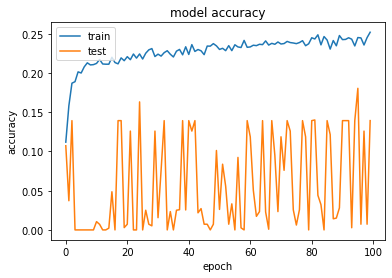

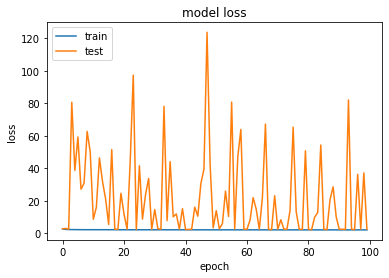

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
from datetime import datetime
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d%m%Y%H%M%S")
model.save('PIR_CNN_Model3_3_' + timestampStr + '.h5')

In [29]:
model.predict(dbX_val[0:1])

array([[1.37027008e-02, 2.58410946e-02, 2.53950227e-02, 2.94649657e-02,
        3.90728414e-02, 5.15739657e-02, 7.52626657e-02, 8.87962803e-02,
        1.08035162e-01, 1.17874295e-01, 1.28770649e-01, 1.18327938e-01,
        1.04160614e-01, 6.09990396e-02, 1.25597809e-02, 1.63016302e-04,
        2.98886960e-14, 2.40375516e-14, 5.71526198e-14, 3.21561659e-14]],
      dtype=float32)

In [30]:
label = np.argmax(dbY_val[0])
print('The actual RUL is: ' + str(bins[label]) + '-' + str(bins[label+1]))
label = np.argmax(model.predict(dbX_val)[0])
print('The predicted RUL is: ' + str(bins[label]) + '-' + str(bins[label+1]))

The actual RUL is: 46315.789473684206-50526.31578947368
The predicted RUL is: 42105.26315789473-46315.789473684206
